# **Tugas**

- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

- Anda diperbolehkan melakukan eksplorasi terhadap,

    - Metode pra pengolahan

    - Pemilihan fitur

    - Arsitektur ANN

    - Fungsi Aktiviasi

- ANN diimplementasikan dengan menggunakan tensorflow.

- **JELASKAN HASIL YANG ANDA DAPATKAN,**

    - **AKURASI**

    - **CONFUSION MATRIX**

    - **KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN**

---


In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

- MNIST adalah dataset gambar dari angka tulisan tangan berukuran 28x28 piksel, di mana setiap angka diberi label 0-9. Dataset ini diimpor dari OpenML.
- `mnist.data` berisi gambar, dan `mnist.target` berisi label (angka dari 0 hingga 9).

In [3]:
mnist = datasets.fetch_openml("mnist_784")

In [4]:
print("Jumlah sampel:", mnist.data.shape[0])  # Jumlah sampel/data points
print("Dimensi setiap sampel:", mnist.data.shape[1])  # Dimensi setiap sampel
print("Jumlah kelas:", len(mnist.target.unique()))

Jumlah sampel: 70000
Dimensi setiap sampel: 784
Jumlah kelas: 10


In [5]:
# Pisahkan data gambar dan label
images = mnist.data.astype('float32')
labels = mnist.target.astype('int')

### Pra-pengolahan Data

In [7]:
# Normalisasi: Skala nilai piksel ke dalam rentang [0, 1]
images /= 255.0

# Pisahkan data menjadi data train dan test (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [8]:
# Standarisasi menggunakan Scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Membangun model ANN



In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Model menggunakan **`Sequential`** untuk membangun neural network secara berurutan, dengan lapisan-lapisan yang ditambahkan satu per satu. Lapisan input menerima gambar 28x28 yang telah diratakan menjadi vektor dengan 784 elemen. Terdapat dua lapisan tersembunyi: lapisan pertama memiliki 128 neuron dengan fungsi aktivasi **ReLU (Rectified Linear Unit)** untuk memperkenalkan non-linearitas, dan lapisan kedua terdiri dari 64 neuron dengan fungsi aktivasi yang sama. Akhirnya, lapisan output memiliki 10 neuron, masing-masing mewakili kelas angka 0 hingga 9, dengan fungsi aktivasi **softmax** untuk mengubah skor menjadi probabilitas dalam klasifikasi multi-kelas.

In [11]:
# Kompilasi model
model.compile(optimizer='adam', # Optimizer Adam
              loss='sparse_categorical_crossentropy',  # Loss untuk klasifikasi multi-kelas
              metrics=['accuracy'])

- `Optimizer Adam`: Digunakan untuk memperbarui bobot secara otomatis dan efisien, menggabungkan keunggulan dari AdaGrad dan RMSProp.
- `Loss sparse_categorical_crossentropy`: Digunakan untuk klasifikasi multi-kelas dengan label integer (0-9), mengukur perbedaan antara prediksi dan label sebenarnya.
- `Metrics accuracy`: Mengukur persentase prediksi yang benar selama pelatihan dan evaluasi.

### Pelatihan Model

`Epoch` menentukan berapa kali model memproses data. `validation_split=0.1 `artinya 10% dari data pelatihan digunakan untuk validasi.
`batch_size: `Jumlah sampel yang diproses sebelum pembaruan parameter model.

In [12]:
# Latih model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8777 - loss: 0.4207 - val_accuracy: 0.9586 - val_loss: 0.1553
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9696 - loss: 0.0976 - val_accuracy: 0.9638 - val_loss: 0.1494
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9783 - loss: 0.0698 - val_accuracy: 0.9668 - val_loss: 0.1439
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9856 - loss: 0.0451 - val_accuracy: 0.9711 - val_loss: 0.1487
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9893 - loss: 0.0343 - val_accuracy: 0.9641 - val_loss: 0.2335
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9891 - loss: 0.0351 - val_accuracy: 0.9712 - val_loss: 0.1687
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0243 - val_accuracy: 0.9734 - val_loss: 0.1568
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9937 - loss: 0.0195 - 

In [21]:
test_lost, test_acc = model.evaluate(x_test, y_test)
print(f"Akurasi pada data pelatihan: {test_acc: 4f}")

train_lost, train_acc = model.evaluate(x_train, y_train)
print(f"Akurasi pada data pengujian: {train_acc: 2f}")

# Prediksi pada data uji
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.9675 - loss: 0.2123
Akurasi pada data pelatihan:  0.966929
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.9936 - loss: 0.0218
Akurasi pada data pengujian:  0.991304
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.95      0.96      1380
           3       0.96      0.96      0.96      1433
           4       0.97      0.96      0.96      1295
           5       0.97      0.95      0.96      1273
           6       0.97      0.98      0.98      1396
           7       0.97      0.96      0.97      1503
           8       0.94      0.96      0.95      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     1

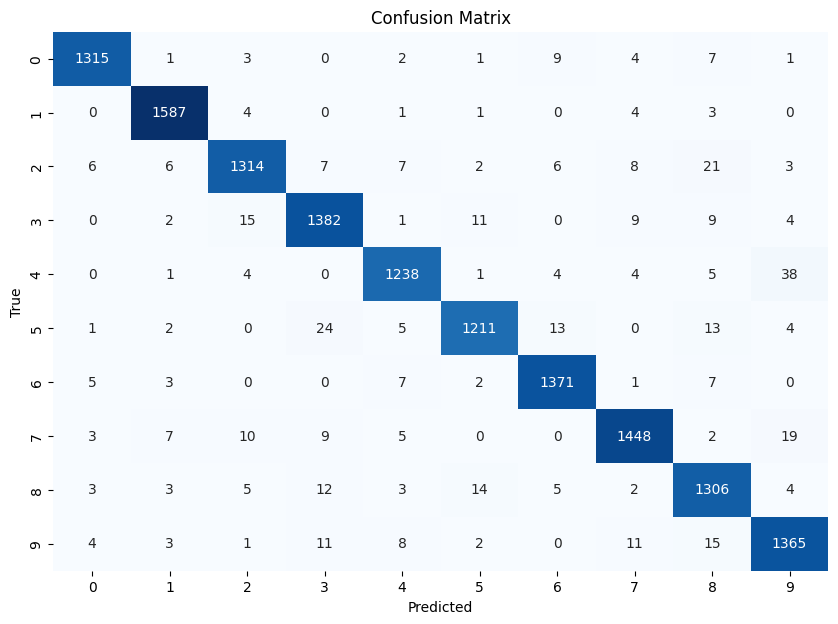

In [23]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix berwarna
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()